Raw Data Sample
               label  abandon  ability  abomination  about  abstract  \
0   Strongly Pro-GMO      0.0      0.0          0.0    0.0       0.0   
1   Strongly Pro-GMO      0.0      0.0          0.0    0.0       0.0   
2  Strongly Anti-GMO      0.0      0.0          0.0    0.0       0.0   
3    Mildly Anti-GMO      0.0      0.0          0.0    0.0       0.0   
4   Strongly Pro-GMO      0.0      0.0          0.0    0.0       0.0   
5     Mildly Pro-GMO      0.0      0.0          0.0    0.0       0.0   
6     Mildly Pro-GMO      0.0      0.0          0.0    0.0       0.0   
7   Strongly Pro-GMO      0.0      0.0          0.0    0.0       0.0   
8    Mildly Anti-GMO      0.0      0.0          0.0    0.0       0.0   
9   Strongly Pro-GMO      0.0      0.0          0.0    0.0       0.0   

   according  account  acknowledge  across  ...  year  years     yerba  yes  \
0        0.0      0.0          0.0     0.0  ...   0.0    0.0  0.000000  0.0   
1        0.0      0.0          0.

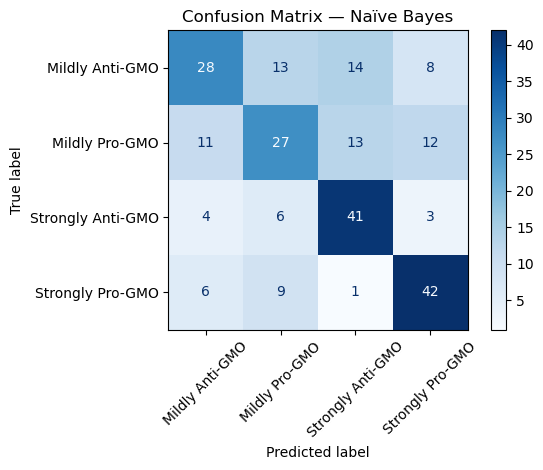

Classification Report
                   precision    recall  f1-score   support

  Mildly Anti-GMO       0.57      0.44      0.50        63
   Mildly Pro-GMO       0.49      0.43      0.46        63
Strongly Anti-GMO       0.59      0.76      0.67        54
 Strongly Pro-GMO       0.65      0.72      0.68        58

         accuracy                           0.58       238
        macro avg       0.58      0.59      0.58       238
     weighted avg       0.57      0.58      0.57       238



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt


df = pd.read_csv('df_tfidf.csv')


print("Raw Data Sample")
print(df.head(10), "\n")


X = df.drop(columns="label")
y = df["label"]


print("Features & Labels")
print(pd.concat([X.head(), y.head()], axis=1), "\n")


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)


print("Training Set Sample")
print(pd.concat([X_train.head(), y_train.head()], axis=1), "\n")


print("Test Set Sample")
print(pd.concat([X_test.head(), y_test.head()], axis=1), "\n")


clf = MultinomialNB()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.3f}\n")


cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix — Naïve Bayes")
plt.tight_layout()
plt.show()


print("Classification Report")
print(classification_report(y_test, y_pred, zero_division=0))
